# Momento de Retroalimentación: 
# Modulo 1 Técnicas de procesamiento de datos para el análisis estadístico y construcción de modelos
# (Portafolio Implementación)
# Alan Contreras Prieto - A01749667

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Preprocessing

### Data set "Animals"

[Animals dataset](https://stat.ethz.ch/R-manual/R-patched/library/MASS/html/Animals.html)

Average brain and body weights for 28 species of land animals.

In [2]:
data = pd.read_csv("Animals-1.csv", header=0, index_col=0)

In [3]:
data.head()

,body,brain
Mountain beaver,1.35,8.1
Cow,465.00,423.0
Grey wolf,36.33,119.5
Goat,27.66,115.0
Guinea pig,1.04,5.5


In [4]:
data.shape

(28, 2)

- We want to use a linear model to study the relation between the brain weight and the body weight

- Simple linear regression (one predictor):

$brain=\beta_0+\beta_1*body+\varepsilon$


### Regression assumption on Y

- Our model: $Y=\beta_0+\beta_1*x+\varepsilon$

- Given that we assume the errors $\varepsilon$ to have normal distribution $N(0,\sigma^2)$, we assume that also $Y$ are normally distributed.

- Check the assumption on $Y$

- If the response variable is not gaussian, a linear model should not be used.



### Initial Visualization

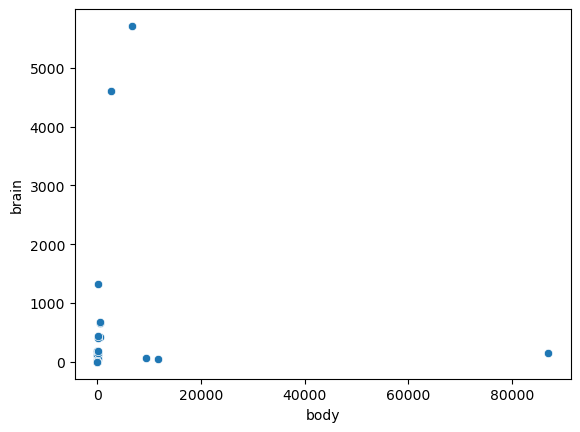

In [5]:
scatterplot = sns.scatterplot(x="body", y="brain", data=data)

### Transformations

Apply the necessary transformations to Y and X (use log tranformation).

In [6]:
data["body"] = np.log(data["body"])
data["brain"] = np.log(data["brain"])
data.sort_values("body")

,body,brain
Mouse,-3.772261,-0.916291
Golden hamster,-2.120264,0.000000
Mole,-2.103734,1.098612
Rat,-1.272966,0.641854
Guinea pig,0.039221,1.704748
Mountain beaver,0.300105,2.091864
Rabbit,0.916291,2.493205
Cat,1.193922,3.242592
Rhesus monkey,1.916923,5.187386
Potar monkey,2.302585,4.744932


### Outliers

Detect the outliers using boxplots, histograms or scatter plots. Findout which are the animals corresponding to the outliers.

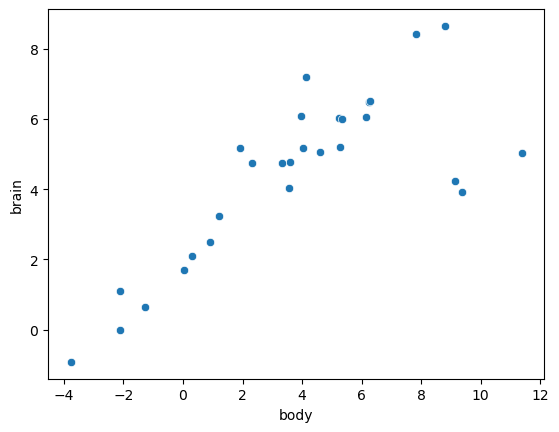

In [7]:
scatterplot = sns.scatterplot(x="body", y="brain", data=data)

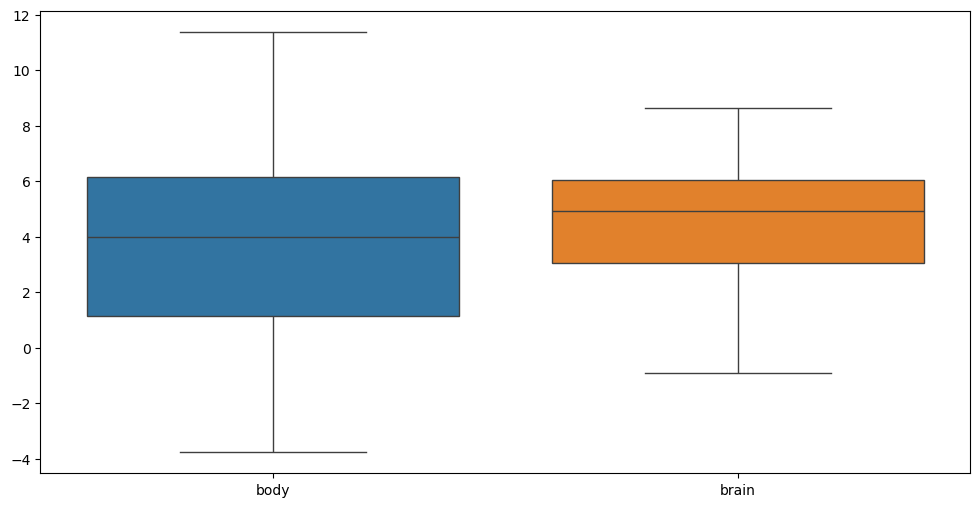

In [8]:
# Convertir a formato largo para seaborn
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['body', 'brain']])
plt.show()

In [9]:
def detect_outliers_iqr(df,column,frame=1.5):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - frame * IQR
  upper_bound = Q3 + frame * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

# Detect outliers in 'body' and 'brain' using the original data (before any manual removal)
outliers_body = detect_outliers_iqr(data, 'body')
outliers_brain = detect_outliers_iqr(data, 'brain')

print("Outliers in Body Weight (log) based on IQR:")
display(outliers_body)

print("\nOutliers in Brain Weight (log) based on IQR:")
display(outliers_brain)

# Combine the outlier lists and find the unique outlier animal names
outlier_animals_iqr = pd.concat([outliers_body, outliers_brain]).drop_duplicates()

print("\nAnimals identified as outliers by IQR in either body or brain weight:")
print(outlier_animals_iqr.index.tolist())

Outliers in Body Weight (log) based on IQR:


,body,brain



Outliers in Brain Weight (log) based on IQR:


,body,brain



Animals identified as outliers by IQR in either body or brain weight:
[]


In [10]:
data.drop(outlier_animals_iqr.index, inplace=True)
data.shape

(28, 2)

# Linear regressions

## Linear regression 1

Apply a simple linear regression using the model:

$\log(brain)=\beta_0+\beta_1*log(body)+\varepsilon $

In [11]:
# Definir la variable dependiente (y) y la variable independiente (x)
y = data["brain"]
x = data["body"]

# Agregar una constante (ordenada en el origen) a la variable independiente
x = sm.add_constant(x)
print(x)
# Ajustar el modelo de regresión lineal
model1 = sm.OLS(y, x).fit()

print(model1.summary())

                  const       body
Mountain beaver     1.0   0.300105
Cow                 1.0   6.142037
Grey wolf           1.0   3.592644
Goat                1.0   3.319987
Guinea pig          1.0   0.039221
Dipliodocus         1.0   9.367344
Asian elephant      1.0   7.842671
Donkey              1.0   5.231643
Horse               1.0   6.255750
Potar monkey        1.0   2.302585
Cat                 1.0   1.193922
Giraffe             1.0   6.270988
Gorilla             1.0   5.332719
Human               1.0   4.127134
African elephant    1.0   8.802973
Triceratops         1.0   9.148465
Rhesus monkey       1.0   1.916923
Kangaroo            1.0   3.555348
Golden hamster      1.0  -2.120264
Mouse               1.0  -3.772261
Rabbit              1.0   0.916291
Sheep               1.0   4.016383
Jaguar              1.0   4.605170
Chimpanzee          1.0   3.954316
Rat                 1.0  -1.272966
Brachiosaurus       1.0  11.373663
Mole                1.0  -2.103734
Pig                 

Denoting with $Y_i$ the observations and with $\hat{Y_i}$ the estimations, the residuals are:

$residuals=|Y_i-\hat{Y_i}|$


Draw an histogram of the residuals and a scatter plot of residuals vs fittedvalues. Do the plots suggest a proper residual behavior?

Draw the regression line on the X,Y scatter plot.

### Dummy variables (Feature engineering)

Should I treat dinosaurs independently? One can make the dataset more interesting introducing dummy variables, one for each type of dinosaurs.

Create four dummy variables: one for Triceratops, one for Dipliodocus, one for Brachiosaurus and one for dinosaur in general.


## Linear regression 2: Regression model with dummy variables

- New model with extra predictors:

$log(brain)=\beta_0+\beta_1*log(body)+\beta_2*DummyT+\beta_3*DummyD+\beta_4*DummyB+\varepsilon$

- A different intercept if it is a dinosaur. Suppose the animal is a triceratop: the variable DummyT is equal to 1, DummyD=DummyB=0.

$\log(brain)=\beta_0+\beta_1*log(body)+\beta_2=$

$(\beta_0+\beta_2)+\beta_1*log(body)$

The intercept is $\beta_0$ when the animal is not a triceratop, while it's $\beta_0+\beta_2$ when the animal is a triceratop.

With this model we consider three different intercepts for the three dinosaurs.



In [12]:
print(data.columns)
print(data.index)
data.loc["Dipliodocus"]["body"]

Index(['body', 'brain'], dtype='object')
Index(['Mountain beaver', 'Cow', 'Grey wolf', 'Goat', 'Guinea pig',
       'Dipliodocus', 'Asian elephant', 'Donkey', 'Horse', 'Potar monkey',
       'Cat', 'Giraffe', 'Gorilla', 'Human', 'African elephant', 'Triceratops',
       'Rhesus monkey', 'Kangaroo', 'Golden hamster', 'Mouse', 'Rabbit',
       'Sheep', 'Jaguar', 'Chimpanzee', 'Rat', 'Brachiosaurus', 'Mole', 'Pig'],
      dtype='object')


np.float64(9.367344120785848)

In [13]:
# Crear columnas dummy para cada dinosaurio específico
data["D_Triceratops"] = (data.index == "Triceratops").astype(int)
data["D_Brachiosaurus"] = (data.index == "Brachiosaurus").astype(int)
data["D_Dipliodocus"] = (data.index == "Dipliodocus").astype(int)

In [14]:
y = data["brain"]
x = data[["body","D_Triceratops","D_Brachiosaurus","D_Dipliodocus"]]

# Agregar una constante (ordenada en el origen) a la variable independiente
x = sm.add_constant(x)

# Ajustar el modelo de regresión lineal
model2 = sm.OLS(y, x).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     68.00
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.10e-12
Time:                        16:27:50   Log-Likelihood:                -28.004
No. Observations:                  28   AIC:                             66.01
Df Residuals:                      23   BIC:                             72.67
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.1504      0.201     

## Linear regression 3

- Model 2: same rate of change, but different intercept for dinasaurs

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\varepsilon$

 For an animal different from a dinosaur, the intercept is $\beta_0$. For a dinosaur the intercept is $\beta_0+\beta_2$.




In [15]:
# Crear columna dummy para "Dinosaur" (si es alguno de los tres)
dino_list = ["Triceratops", "Brachiosaurus", "Dipliodocus"]
data["Dinosaur"] = data.index.isin(dino_list).astype(int)

In [16]:
y = data["brain"]
x = data[["body","Dinosaur"]]

# Agregar una constante (ordenada en el origen) a la variable independiente
x = sm.add_constant(x)

# Ajustar el modelo de regresión lineal
model3 = sm.OLS(y, x).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.09e-14
Time:                        16:27:50   Log-Likelihood:                -28.446
No. Observations:                  28   AIC:                             62.89
Df Residuals:                      25   BIC:                             66.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1616      0.195     11.090      0.0

## Linear regression 4

 Different intercept and slope for dinosaurs. We add the feature where we multiply the variables "Dino" and "log(body)".

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\beta_3*log(body)*Dino+\varepsilon$

For an animal other than a dinosaur, the intercept is $\beta_0$ and the slope $\beta_1$. For a dinosaur, the intercept is $\beta_0+\beta_2$ and the slope is $\beta_1+\beta_3$.

Which is the best model?

In [17]:
data["Dino*bodylog"] = data["body"] * data["Dinosaur"]

In [18]:
y = data["brain"]
x = data[["body","Dinosaur","Dino*bodylog"]]

# Agregar una constante (ordenada en el origen) a la variable independiente
x = sm.add_constant(x)

# Ajustar el modelo de regresión lineal
model4 = sm.OLS(y, x).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     93.82
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.15e-13
Time:                        16:27:50   Log-Likelihood:                -28.113
No. Observations:                  28   AIC:                             64.23
Df Residuals:                      24   BIC:                             69.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1504      0.197     10.908   

# Prueba ANOVA

Al clasificar los animales en grupos basados en su alimentación (herbívoros, carnívoros y omnívoros), podemos examinar si esta variable tiene un efecto significativo en alguna de sus características físicas, como el peso corporal o el peso del cerebro. Para ello, se aplica una prueba ANOVA (Análisis de Varianza). Esta prueba estadística comparará las medias de estas características entre los tres grupos para determinar si las diferencias observadas son lo suficientemente grandes como para ser consideradas estadísticamente significativas, en lugar de ser producto del azar. En esencia, la prueba ANOVA nos ayuda a saber si la dieta de un animal está fuertemente correlacionada con ciertas de sus medidas corporales, lo que podría indicar una diferencia evolutiva o biológica real entre los grupos.

In [19]:
data.drop(columns=["D_Triceratops","D_Brachiosaurus","D_Dipliodocus","Dino*bodylog"], inplace=True)
#data

In [20]:
vegggie = ["Cow", "Goat", "Asian elephant","Donkey","Horse","Giraffe","African elephant","Kangaroo","Rabbit","Sheep"]
data["vegggie"] = data.index.isin(vegggie).astype(int)
veggies = data.loc[data['vegggie'] == 1]
veggies

,body,brain,Dinosaur,vegggie
Cow,6.142037,6.047372,0,1
Goat,3.319987,4.744932,0,1
Asian elephant,7.842671,8.434464,0,1
Donkey,5.231643,6.037871,0,1
Horse,6.255750,6.484635,0,1
Giraffe,6.270988,6.522093,0,1
African elephant,8.802973,8.650325,0,1
Kangaroo,3.555348,4.025352,0,1
Rabbit,0.916291,2.493205,0,1
Sheep,4.016383,5.164786,0,1


In [21]:
carni = ["Grey wolf", "Cat", "Jaguar"]
data["carni"] = data.index.isin(carni).astype(int)
carnies = data.loc[data['carni'] == 1]
carnies

,body,brain,Dinosaur,vegggie,carni
Grey wolf,3.592644,4.783316,0,0,1
Cat,1.193922,3.242592,0,0,1
Jaguar,4.605170,5.056246,0,0,1


In [22]:
omni = ["Mountain beaver", "Guinea pig", "Potar monkey","Gorilla","Human","Rhesus monkey","Golden hamster","Mouse","Chimpanzee","Rat","Mole","Pig"]
data["omni"] = data.index.isin(omni).astype(int)
omnis = data.loc[data['omni'] == 1]
omnis

,body,brain,Dinosaur,vegggie,carni,omni
Mountain beaver,0.300105,2.091864,0,0,0,1
Guinea pig,0.039221,1.704748,0,0,0,1
Potar monkey,2.302585,4.744932,0,0,0,1
Gorilla,5.332719,6.006353,0,0,0,1
Human,4.127134,7.185387,0,0,0,1
Rhesus monkey,1.916923,5.187386,0,0,0,1
Golden hamster,-2.120264,0.000000,0,0,0,1
Mouse,-3.772261,-0.916291,0,0,0,1
Chimpanzee,3.954316,6.086775,0,0,0,1
Rat,-1.272966,0.641854,0,0,0,1


In [23]:
dinosaurios = data.loc[data['Dinosaur'] == 1]
dinosaurios

,body,brain,Dinosaur,vegggie,carni,omni
Dipliodocus,9.367344,3.912023,1,0,0,0
Triceratops,9.148465,4.248495,1,0,0,0
Brachiosaurus,11.373663,5.040194,1,0,0,0


In [24]:
mapa = {
    "Dinosaur": 0,
    "vegggie": 1,
    "carni": 2,
    "omni": 3
}

# Crear columna "Categoria"
data["Categoria"] = data.apply(lambda row: [mapa[col] for col in mapa if row[col] == 1][0], axis=1)
data

,body,brain,Dinosaur,vegggie,carni,omni,Categoria
Mountain beaver,0.300105,2.091864,0,0,0,1,3
Cow,6.142037,6.047372,0,1,0,0,1
Grey wolf,3.592644,4.783316,0,0,1,0,2
Goat,3.319987,4.744932,0,1,0,0,1
Guinea pig,0.039221,1.704748,0,0,0,1,3
Dipliodocus,9.367344,3.912023,1,0,0,0,0
Asian elephant,7.842671,8.434464,0,1,0,0,1
Donkey,5.231643,6.037871,0,1,0,0,1
Horse,6.255750,6.484635,0,1,0,0,1
Potar monkey,2.302585,4.744932,0,0,0,1,3


In [25]:
# Extraer los datos de 'body' para cada grupo de dieta
datos_dino = data[data['Categoria'] == 0]['body']
datos_veggie = data[data['Categoria'] == 1]['body']
datos_carni = data[data['Categoria'] == 2]['body']
datos_omni = data[data['Categoria'] == 3]['body']

In [26]:
from scipy import stats


fvalue, pvalue = stats.f_oneway(datos_dino, datos_veggie, datos_carni,datos_omni)

print(f"F-value: {fvalue:.4f}")
print(f"P-value: {pvalue:.4f}")

F-value: 10.6593
P-value: 0.0001


In [27]:
import statsmodels.stats.multicomp as mc

# Concatenate the samples and create labels for the groups
all_samples = np.concatenate((datos_dino, datos_veggie, datos_carni, datos_omni))
labels = ['Dinosaur'] * len(datos_dino) + ['Veggie'] * len(datos_veggie) + ['Carni'] * len(datos_carni) + ['Omni'] * len(datos_omni)

# Perform Tukey's HSD test
tukey_result = mc.pairwise_tukeyhsd(all_samples, labels, alpha=0.05)

# Print the results
print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   Carni Dinosaur   6.8326  0.019   0.9342  12.731   True
   Carni     Omni  -1.9671 0.6548  -6.6302   2.696  False
   Carni   Veggie   2.1048   0.62  -2.6506  6.8603  False
Dinosaur     Omni  -8.7997 0.0001 -13.4628 -4.1366   True
Dinosaur   Veggie  -4.7278 0.0517  -9.4832  0.0277  False
    Omni   Veggie    4.072 0.0068   0.9788  7.1651   True
---------------------------------------------------------


In [28]:
anova_test = sm.stats.anova_lm(model1,model3,model4,model2)
anova_test

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,26.0,60.987988,0.0,NaN,NaN,NaN
1,25.0,12.505428,1.0,48.482560,92.024838,7.367435e-10
2,24.0,12.211564,1.0,0.293863,0.557782,4.624095e-01
3,23.0,12.117369,1.0,0.094196,0.178793,6.763398e-01


# Predicción animal

Capybara

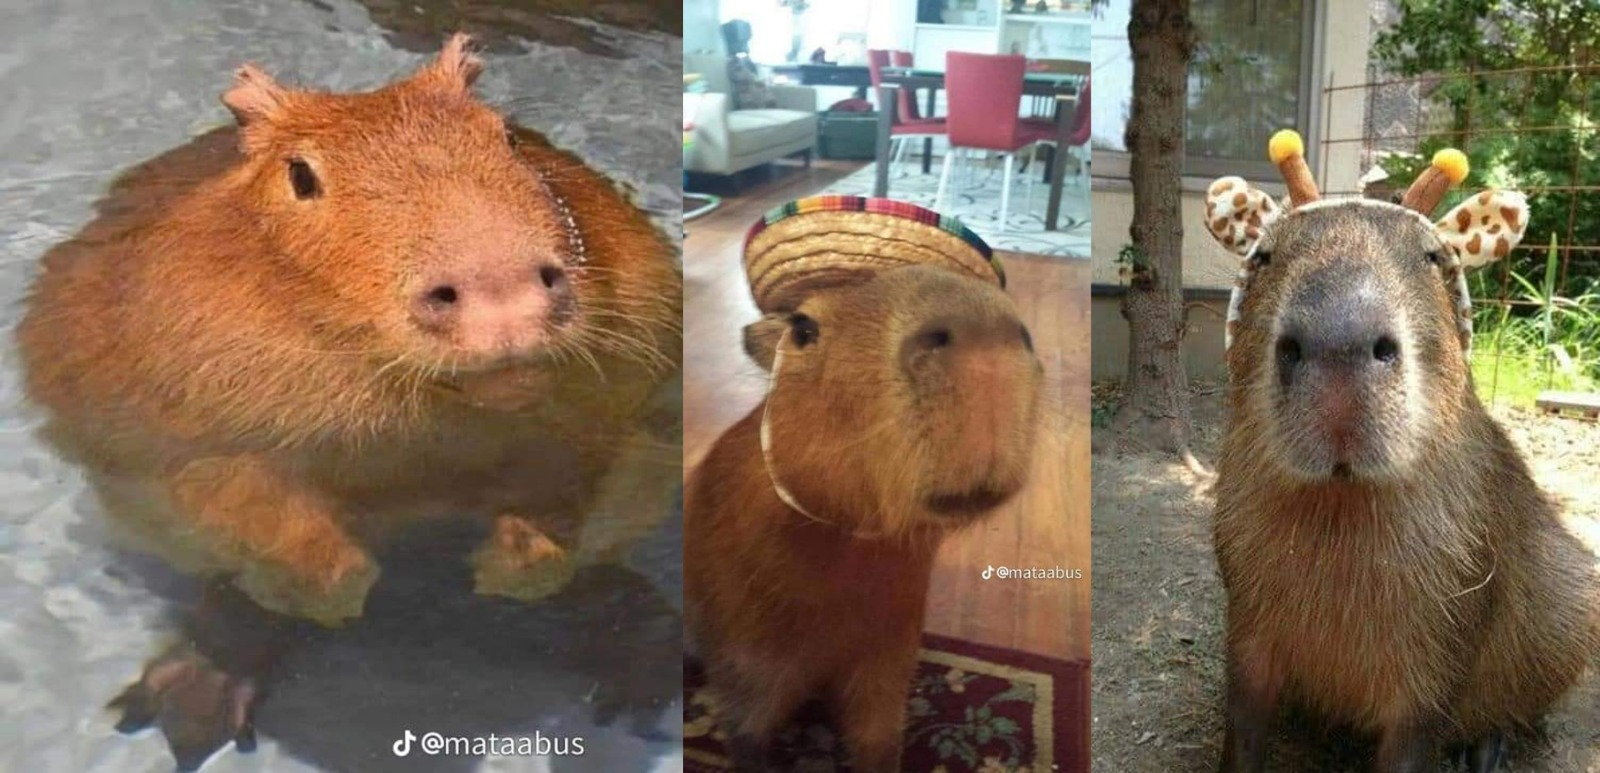

Según la inteligencia artificial, un capibara adulto pesa entre 35 y 65 kilogramos. Y su cerebro pesa aproximadamente entre 75 y 100 gramos.


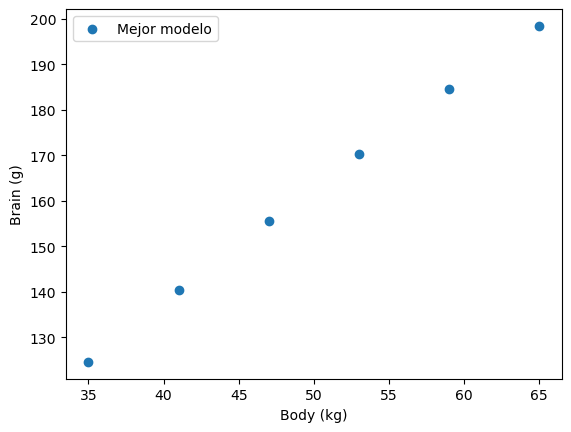

In [ ]:
body_min = 35
body_max = 65
x = np.linspace(body_min, body_max, 6)
din = 0
res = []

#r1= model1.predict((1,np.log(body)))     # Cosas de dinosaurios
#print("Modelo 1: ", np.exp(r1))
#r2= model2.predict((1,np.log(i),         0,0,0))
#print("Modelo 2: ", np.exp(r2))
#r3= model3.predict((1,np.log(body),      0))
#print("Modelo 3: ", np.exp(r3))
#r4= model4.predict((1,np.log(body),      din,np.log(body)*din))
#print("Modelo 4: ", np.exp(r4))

for i in x:
    r2= model2.predict((1,np.log(i),      0,0,0))
    res.append(np.exp(r2))

plt.scatter(x, res, label="Mejor modelo")
plt.xlabel("Body (kg)")
plt.ylabel("Brain (g)")
plt.legend()
plt.show()

Comparando los resultados con el modelo, incluso con el peso mas bajo de un capibara se excede el peso investigado.